Student Pass/Fail Prediction

1: Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

2: Creating a Sample Dataset

In [2]:
data = {
    'Study Hours': [5, 12, 8, 15, 7, 10, 3, 9, 2, 11, 13, 6, 14, 1, 4, 16, 7, 5, 10, 12],
    'Attendance': [50, 80, 70, 90, 65, 75, 40, 85, 30, 78, 92, 55, 88, 20, 45, 95, 68, 58, 73, 81],
    'Pass':        [0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1]
}

df = pd.DataFrame(data)
df.head()

,Study Hours,Attendance,Pass
0,5,50,0
1,12,80,1
2,8,70,1
3,15,90,1
4,7,65,0


3: Data Exploration

In [3]:

print("Missing values:\n", df.isnull().sum())
print("\nSummary statistics:\n", df.describe())

Missing values:
 Study Hours    0
Attendance     0
Pass           0
dtype: int64

Summary statistics:
        Study Hours  Attendance       Pass
count    20.000000   20.000000  20.000000
mean      8.500000   66.900000   0.550000
std       4.406932   21.284786   0.510418
min       1.000000   20.000000   0.000000
25%       5.000000   53.750000   0.000000
50%       8.500000   71.500000   1.000000
75%      12.000000   82.000000   1.000000
max      16.000000   95.000000   1.000000


4: Data Visualization

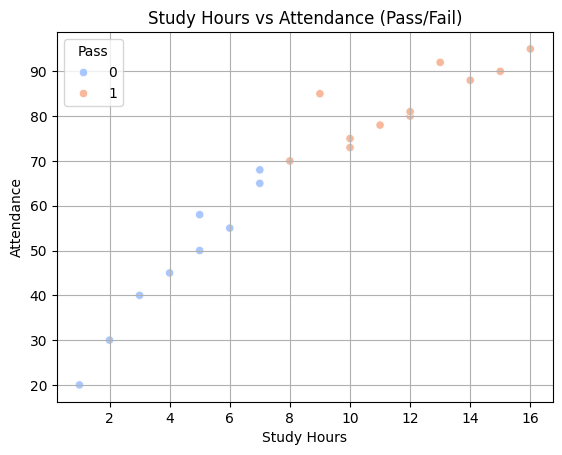

In [4]:
sns.scatterplot(data=df, x='Study Hours', y='Attendance', hue='Pass', palette='coolwarm')
plt.title("Study Hours vs Attendance (Pass/Fail)")
plt.grid(True)
plt.show()

5: Feature and Target selection

In [5]:
X = df[['Study Hours', 'Attendance']]
y = df['Pass']

6: Train - Test Split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

7: Model Training - Logistic Regression

In [7]:
model = LogisticRegression()
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


8: Model Evaluation

In [8]:
y_pred = model.predict(X_test)

In [9]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", round(accuracy * 100, 2), "%")

Accuracy: 100.0 %


In [10]:
model.score(X_test,y_test)*100

100.0

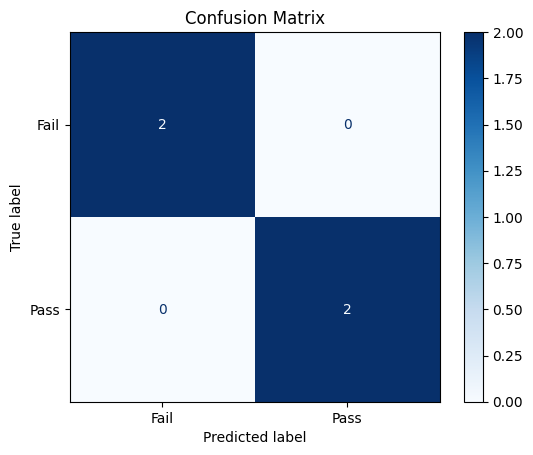

In [11]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Fail", "Pass"])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()